# Reconocimiento de Patrones y Aprendizaje Automatizado
## Práctica 1. Fundamentos en Python

Profesores: Miguel Daniel Garrido Reyes\
Ayudante: Melissa Vázquez González\
Ayud. Lab.: Luis Emilio González Covarrubias

Alumna: Itzel Morales García        No. Cuenta: 318310420

## Ejercicios
### El mínimo, máximo, media y desviación estándar tanto para el número de horas dedicadas como para las calificaciones obtenidas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [2]:
#Cargamos los datos
df = pd.read_csv('grades_data.csv')
#visualiza el csv
print(df)

              nombre     apellido   horas_dedicadas  calificaciones_obtenida
0      Sofía Sánchez    Rodríguez                52                       45
1        Luis Romero       Romero                 2                      nan
2          Juan Díaz        López               170                      100
3   Miguel Hernández      Álvarez                42                      nan
4      Juan González         Díaz               125                       70
5        Juan García    Fernández                47                       40
6        Luis Romero        López               149                      100
7   Miguel Fernández       Romero               162                       80
8       Carmen Pérez      Álvarez               139                       45
9     Juan Rodríguez       Romero                18                       30
10       Paula Pérez         Díaz                30                        0
11     Ana Fernández       García               152                      100

In [3]:
#Nos aseguramos de que los nombres de las columnas en el DataFrame estén limpios de espacios en blanco adicionales
df.columns = df.columns.str.strip()

#Hacemos una copia del Data
df_copia = df.copy()

#Eliminamos las filas con valores no numéricos en 'calificaciones_obtenida'
df_copia = df_copia.dropna(subset=['calificaciones_obtenida'])
df_copia['calificaciones_obtenida'] = pd.to_numeric(df_copia['calificaciones_obtenida'], errors='coerce')

#Calculamos el mínimo, máximo, media y desviación estándar de las horas dedicadas
min_horas_dedicadas = df_copia['horas_dedicadas'].min()
max_horas_dedicadas = df_copia['horas_dedicadas'].max()
media_horas_dedicadas = df_copia['horas_dedicadas'].mean()
std_horas_dedicadas = df_copia['horas_dedicadas'].std()

#Tambipen claculamos el mínimo, máximo, media y desviación estándar de las calificaciones obtenidas
min_calificaciones = df_copia['calificaciones_obtenida'].min()
max_calificaciones = df_copia['calificaciones_obtenida'].max()
media_calificaciones = df_copia['calificaciones_obtenida'].mean()
std_calificaciones = df_copia['calificaciones_obtenida'].std()

#imprimimos todo
print("Estadísticas de Horas Dedicadas:")
print(f"Mínimo: {min_horas_dedicadas}")
print(f"Máximo: {max_horas_dedicadas}")
print(f"Media: {media_horas_dedicadas}")
print(f"Desviación Estándar: {std_horas_dedicadas}")

print("\nEstadísticas de Calificaciones Obtenidas:")
print(f"Mínimo: {min_calificaciones}")
print(f"Máximo: {max_calificaciones}")
print(f"Media: {media_calificaciones}")
print(f"Desviación Estándar: {std_calificaciones}")

Estadísticas de Horas Dedicadas:
Mínimo: 2
Máximo: 178
Media: 99.4
Desviación Estándar: 58.129075974801204

Estadísticas de Calificaciones Obtenidas:
Mínimo: 0.0
Máximo: 100.0
Media: 64.05555555555556
Desviación Estándar: 33.539217119177366


### Lleva a cabo un análisis de regresión lineal utilizando estos datos y presenta un gráfico que muestre el modelo de regresión junto con los datos originales

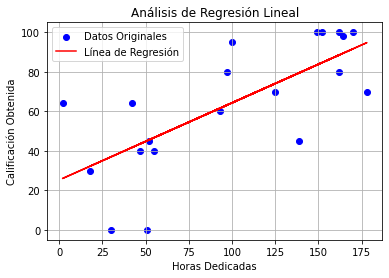

In [4]:
#Hacemos una copia del Data nuevamente
df_copia = df.copy()

#Eliminamos filas con valores NaN en 'horas_dedicadas' y 'calificaciones_obtenida'
df_copia.dropna(subset=['horas_dedicadas', 'calificaciones_obtenida'], inplace=True)

#Extraemos las variables independientes (X) y dependientes (y)
X = df_copia[['horas_dedicadas']]
y = df['calificaciones_obtenida']

#Impoutamos valores faltantes en X y y
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1, 1))

#Creamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

#Cacemos las predicciones usando el modelo entrenado
predicted_grades = model.predict(X)

#Ploteamos los datos originales y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos Originales')
plt.plot(X, predicted_grades, color='red', label='Línea de Regresión')

plt.title('Análisis de Regresión Lineal')
plt.xlabel('Horas Dedicadas')
plt.ylabel('Calificación Obtenida')
plt.legend()
plt.grid(True)
plt.show()


### Utiliza el modelo de regresión para realizar una predicción de la calificación de un estudiante que hubiera dedicado n horas en el semestre a la materia (donde n es la suma de los d ́ıgitos de su n ́umero de cuenta módulo 50).

In [5]:
#Función para predecir la calificación basada en horas dedicadas
def predict_grade(hours):
    return model.predict([[hours]])

#Calculamos n como la suma de los dígitos de '318310420' módulo 50
n = sum(map(int, str(318310420))) % 50

#Hacemos la predicción para n horas dedicadas
predicted_grade = predict_grade(n)

print(f"La calificación predicha para un estudiante que dedicó {n} horas es: {predicted_grade[0][0]}")

La calificación predicha para un estudiante que dedicó 22 horas es: 33.82773596452242


### Investiga métodos para evaluar la bondad de ajuste a tu modelo y determinar cuán efectivamente explica el comportamiento de los datos.

Gráficos de residuos: Los gráficos de residuos son útiles para visualizar la diferencia entre los valores predichos por el modelo y los valores reales. Si los residuos se distribuyen de manera aleatoria alrededor de cero y no muestran patrones discernibles, es una indicación de un buen ajuste del modelo.
Coeficiente de determinación (R cuadrado): Este es uno de los métodos más utilizados para evaluar la bondad de ajuste. R cuadrado varía entre 0 y 1, donde 0 indica que el modelo no explica la variabilidad de los datos y 1 indica un ajuste perfecto. En general, cuanto más cercano a 1 esté R cuadrado, mejor será el ajuste del modelo a los datos observados.